In [2]:
import matplotlib.pyplot as plt

# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# 확인 이후
plt.rc('font', family='Malgun Gothic')

['cmtt10', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeTwoSym', 'DejaVu Sans', 'STIXGeneral', 'STIXNonUnicode', 'cmss10', 'DejaVu Sans', 'cmr10', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Serif', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXGeneral', 'cmsy10', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'cmmi10', 'cmb10', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXNonUnicode', 'cmex10', 'Bookman Old Style', 'Bookshelf Symbol 7', 'Maiandra GD', 'Malgun Gothic', 'Bodoni MT', 'High Tower Text', 'Gill Sans MT', 'Perpetua', 'Calibri', 'Dubai', 'Constantia', 'Gill Sans Ultra Bold', 'HCR Dotum', 'Sitka Small', 'Bodoni MT', 'Freestyle Script', 'Constantia', 'Gabriola', 'Franklin Gothic Book', 'Leelawadee', 'Franklin Gothic Medium', 'Lucida Sans Typewriter', 'Palatino

Cross-Validation Mean Squared Error (MSE): 0.0029497834709089413
Train Mean Squared Error (MSE): 0.0002127139018180284
Test Mean Squared Error (MSE): 0.00048303403181788196
의료시설 수: 0.0012485364449811164
대중교통만족도: 0.001318508426817216
문화시설 수: 0.0008085180816246229
경제력: 0.0010471897641676489
주택가격 안정화지수: 0.0016442249872617321
1인당 녹지 면적: 0.0006217777657729588
전체녹지: 0.0008257868547769345
상업시설 수: 0.0012502132210439629
주거환경만족도: 0.9912352444535538


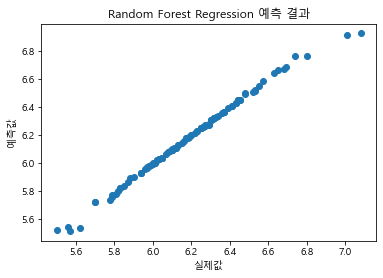

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("life_data.xlsx")

label_name = '주거환경만족도'
cols = [ '의료시설 수', '대중교통만족도', '문화시설 수', '경제력','주택가격 안정화지수', '1인당 녹지 면적', '전체녹지', '상업시설 수', '주거환경만족도']

x = df[cols]
y = df[label_name]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# 3. 모델 생성과 학습
rf_model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=1000, random_state=42))
rf_model.fit(x_train, y_train)

# 4. 교차 검증 및 예측 평가
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
print("Cross-Validation Mean Squared Error (MSE):", cv_mse)

# 5. 과적합 확인
y_train_pred = rf_model.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

y_test_pred = rf_model.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

importance = rf_model.named_steps['randomforestregressor'].feature_importances_

# 중요도 출력
for col, importance in zip(cols, importance):
    print(f"{col}: {importance}")

# 예측 결과 시각화
plt.scatter(y_test, y_test_pred)
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("Random Forest Regression 예측 결과")
plt.show()
